# Image Classification - Lab

## Introduction

Now that you have a working knowledge of CNNs and have practiced implementing associated techniques in Keras, its time to put all of those skills together. In this lab, you'll work to complete a [Kaggle competition](https://www.kaggle.com/c/dog-breed-identification) on classifying dog breeds.


## Objectives

In this lab you will: 

- Compare and apply multiple techniques for tuning a model using data augmentation and pretrained models  

## Download and Load the Data

Start by downloading the data locally and loading it into a Pandas DataFrame. Be forewarned that this dataset is fairly large and it is advisable to close other memory intensive applications.

The data can be found [here](https://www.kaggle.com/c/dog-breed-identification/data).

It's easiest if you download the data into this directory on your local computer. From there, be sure to uncompress the folder and subfolders. If you download the data elsewhere, be sure to modify the file path when importing the file below.

# No code per se, but download and decompress the data

## Preprocessing

Now that you've downloaded the data, its time to prepare it for some model building! You'll notice that the current structure provided is not the same as our lovely preprocessed folders that you've been given to date. Instead, you have one large training folder with images and a csv file with labels associated with each of these file types. 

Use this to create a directory substructure for a train-validation-test split as we have done previously. Also recall that you'll also want to use one-hot encoding as you are now presented with a multi-class problem as opposed to simple binary classification.

In [1]:
import pandas as pd
import numpy as np
import os, shutil
from keras_preprocessing.image import ImageDataGenerator
import datetime
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Your code here; open the labels.csv file stored in the zip file
raw = pd.read_csv("dog-breed-identification\labels.csv")

In [3]:
raw

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher



In order to input the data into our standard pipeline, you'll need to organize the image files into a nested folder structure. At the top level will be a folder for the training data, a folder for the validation data, and a folder for the test data. Within these top directory folders, you'll then need to create a folder for each of the categorical classes (in this case, dog breeds). Finally, within these category folders you'll then place each of the associated image files. To save time, do this for just 3 of the dog breeds such as `'boston_bull'`, `'toy_poodle'`, and `'scottish_deerhound'`.

You're nested file structure should look like this:
* train
    * category_1
    * category_2
    * category_3
    ...
* val
    * category_1
    * category_2
    * category_3
    ...
* test 
    * category_1
    * category_2
    * category_3
    ...  

> **Hint**: To do this, you can use the `os` module which will you can use to execute many common bash commands straight from your python interpreter. For example, here's how you could make a new folder: 

```python
import os
os.mkdir('New_Folder_Name')
```
Start by creating top level folders for the train, validation, and test sets. Then, use your pandas DataFrame to split the example images for each breed of dog into a 80% train set, and 10% validation and test sets. Use `os.path.join()` with the information from the DataFrame to construct the relevant file path. With this, place the relevant images using the `shutil.copy()` into the appropriate directory. 

>> **Note**: It is worthwhile to try this exercise on your own, but you can also use the images stored under the `'data_org_subset/'` folder of this repository, in which the Kaggle dataset has already been subset and preprocessed.

In [4]:
# Your code here; transform the image files and then load them into Keras as tensors 
# (be sure to perform a train-val-test split)
train = raw.sample(frac=0.8)
val_test = raw.drop(train.index)
val = val_test.sample(frac=0.5)
test = val_test.drop(val.index)

for i in ['train', 'validation', 'test']:
    os.mkdir(i)
    for b in raw["breed"].unique():
        os.mkdir(os.path.join(i, b))
        
for i in train.index:
    a = os.path.join("dog-breed-identification/train/" + 
                     train['id'][i] + ".jpg")
    z = os.path.join("train/{}/{}.jpg".format(train["breed"][i], train["id"][i]))
    shutil.copy(a, z)
    
for i in val.index:
    a = os.path.join("dog-breed-identification/train/{}.jpg".format(val['id'][i]))
    z = os.path.join("validation/{}/{}.jpg".format(val["breed"][i], val["id"][i]))
    shutil.copy(a, z)
    
for i in test.index:
    a = os.path.join("dog-breed-identification/train/{}.jpg".format(test['id'][i]))
    z = os.path.join("test/{}/{}.jpg".format(test["breed"][i], test["id"][i]))
    shutil.copy(a, z)

In [5]:
idg_train = ImageDataGenerator(rescale=1./255)
idg_val = ImageDataGenerator(rescale=1./255)

train_gen = idg_train.flow_from_directory("train/", 
                                          target_size=(64, 64), 
                                          batch_size=32, 
                                          class_mode="categorical")

val_gen = idg_val.flow_from_directory("validation/", 
                                      target_size=(64, 64), 
                                      batch_size=32, 
                                      class_mode="categorical")

Found 8178 images belonging to 120 classes.
Found 1022 images belonging to 120 classes.


## Optional: Build a Baseline CNN

This is an optional step. Adapting a pretrained model will produce better results, but it may be interesting to create a CNN from scratch as a baseline. If you wish to, do so here.

In [6]:
# Create a baseline CNN model
from keras import models, optimizers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = models.Sequential()

model.add(Conv2D(filters=32, 
                 kernel_size=(3, 3), 
                 activation="relu", 
                 input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, 
                 kernel_size=(3, 3), 
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, 
                 kernel_size=(3, 3), 
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(120, activation="sigmoid"))

model.compile(loss="categorical_crossentropy", 
              optimizer=optimizers.RMSprop(1e-4), 
              metrics=["accuracy"])

history = model.fit_generator(train_gen, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=val_gen, 
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 28s 285ms/step - loss: 4.7863 - accuracy: 0.0100 - val_loss: 4.7856 - val_accuracy: 0.0056
Epoch 2/30
100/100 [==============================] - 24s 242ms/step - loss: 4.7840 - accuracy: 0.0097 - val_loss: 4.8085 - val_accuracy: 0.0075
Epoch 3/30
100/100 [==============================] - 20s 198ms/step - loss: 4.7762 - accuracy: 0.0135 - val_loss: 4.7451 - val_accuracy: 0.0100
Epoch 4/30
100/100 [==============================] - 15s 152ms/step - loss: 4.7482 - accuracy: 0.0150 - val_loss: 4.6994 - val_accuracy: 0.0213
Epoch 5/30
100/100 [==============================] - 15s 150ms/step - loss: 4.6876 - accuracy: 0.0228 - val_loss: 4.8455 - val_accuracy: 0.0225
Epoch 6/30
100/100 [==============================] - 16s 156ms/step - loss: 4.6146 - accuracy: 0.0210 - val_loss: 4.5516 - val_accuracy: 0.0244
Epoch 7/30
100/100 [==============================] - 15s 151ms/step - loss: 4.5550 - accuracy: 0.0300 - val_loss: 4.5739 - val_ac

In [7]:
model.save("Baseline_CNN.h5")

## Loading a Pretrained CNN

## Feature Engineering with the Pretrained Model

As you may well have guessed, adapting a pretrained model will undoubtedly produce better results then a fresh CNN due to the limited size of training data. Import a pretrained model such as VGG-19 to use a convolutional base. Use this to transform the dataset into a rich feature space and add a few fully connected layers on top of the pretrained layers to build a classification model. (Be sure to leave the pretrained model frozen!)

In [8]:
# Your code here; add fully connected layers on top of the convolutional base
from keras.applications import VGG19

cnn_base = VGG19(weights='imagenet', 
                 include_top=False, 
                 input_shape=(64, 64, 3))

model = models.Sequential()
model.add(cnn_base)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(120, activation="sigmoid"))

cnn_base.trainable = False

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode="nearest")

train_generator = train_datagen.flow_from_directory("train/",  
                                                    target_size=(64, 64),  
                                                    batch_size= 32, 
                                                    class_mode= "categorical") 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory("validation/",  
                                                                       target_size=(64, 64),  
                                                                       batch_size=32, 
                                                                       class_mode="categorical")

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory("test/",  
                                                                        target_size=(64, 64), 
                                                                        batch_size=180,
                                                                        class_mode="categorical")

test_images, test_labels = next(test_generator)

model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=["accuracy"])

history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=val_generator, 
                              validation_steps=50)

Found 8178 images belonging to 120 classes.
Found 1022 images belonging to 120 classes.
Found 1022 images belonging to 120 classes.
Epoch 1/30
100/100 [==============================] - 62s 617ms/step - loss: 4.7915 - accuracy: 0.0119 - val_loss: 4.7874 - val_accuracy: 0.0156
Epoch 2/30
100/100 [==============================] - 61s 612ms/step - loss: 4.7813 - accuracy: 0.0107 - val_loss: 4.7083 - val_accuracy: 0.0182
Epoch 3/30
100/100 [==============================] - 61s 613ms/step - loss: 4.7667 - accuracy: 0.0181 - val_loss: 4.7627 - val_accuracy: 0.0138
Epoch 4/30
100/100 [==============================] - 62s 615ms/step - loss: 4.7479 - accuracy: 0.0197 - val_loss: 4.6945 - val_accuracy: 0.0207
Epoch 5/30
100/100 [==============================] - 61s 613ms/step - loss: 4.7298 - accuracy: 0.0194 - val_loss: 4.7448 - val_accuracy: 0.0244
Epoch 6/30
100/100 [==============================] - 61s 610ms/step - loss: 4.6761 - accuracy: 0.0268 - val_loss: 4.7794 - val_accuracy: 0.032

## Visualize History

Now fit the model and visualize the training and validation accuracy/loss functions over successive epochs.

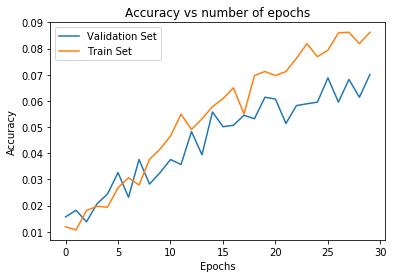

In [9]:
# Your code here; visualize the training / validation history associated with fitting the model
#plt.figure()
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["accuracy"])
plt.legend(['Validation Set', 'Train Set'])
plt.title("Accuracy vs number of epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [10]:
# Save model
model.save("vgg19_FE_AUG_30epochs.h5")

## Final Model Evaluation

Now that you've trained and validated the model, perform a final evaluation of the model on the test set.

In [11]:
# Your code here
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.06232427433133125


## Summary

Congratulations! In this lab, you brought all of your prior deep learning skills together from preprocessing including one-hot encoding, to adapting a pretrained model. There are always ongoing advancements in CNN architectures and best practices, but you have a solid foundation and understanding at this point.